In [94]:
import matplotlib.pyplot as plt

def build_dots(xs, ys):
    plt.plot(xs, ys, 'r')
    plt.grid()
    plt.show()

## Basic approximation funcs

In [162]:
import math

def linear(xs, k, b):
    res = []
    for x in xs:
        res.append(k*x + b)
    return res

def polynomial_second_degree(xs, a0, a1, a2):
    res = []
    for x in xs:
        res.append(a0*x**2 + a1*x + a2)
    return res

def exponent(xs, a, b):
    res = []
    for x in xs:
        res.append(a * math.exp(b*x))
    return res

def ln(xs, a, b):
    res = []
    for x in xs:
        res.append(a * math.log(x, math.exp(1)) + b)
    return res

def power(xs, a, b):
    res = []
    for x in xs:
        res.append(a*pow(x, b))
    return res

## Sums and eps

In [125]:
def sx(xs):
    res = 0
    for x in xs:
        res += x
    return res

def sxx(xs):
    res = 0
    for x in xs:
        res += x**2
    return res

def sxy(xs, ys):
    res = 0
    for i in range(len(xs)):
        res += xs[i] * ys[i]
    return res

def sxxy(xs, ys):
    res = 0
    for i in range(len(xs)):
        res += xs[i]**2 * ys[i]
    return res

def pow_n(xs, n):
    res = 0
    for x in xs:
        res += x**n
    return res

def epsilon(ys1, ys2):
    res = []
    for i in range(len(ys1)):
        res.append(ys1[i] - ys2[i])
    return res

def standard_deviation(eps):
    return math.sqrt(sxx(eps)/len(eps))

In [157]:
def linear_approximation(xs, ys):
    a = (sxy(xs, ys)*len(xs) - sx(xs)*sx(ys))/(sxx(xs)*len(xs) - sx(xs)**2)
    b = (sxx(xs)*sx(ys) - sx(xs)*sxy(xs, ys))/(sxx(xs)*len(xs) - sx(xs)**2)
    return [a, b]

# a3, a2, a1
def square_approximation(xs, ys):
    left = np.array([[len(xs), sx(xs), sxx(xs)],
                             [sx(xs), sxx(xs), pow_n(xs, 3)],
                             [sxx(xs), pow_n(xs, 3), pow_n(xs, 4)]])
    right = np.array([sx(ys), sxy(xs, ys), sxxy(xs, ys)])
    return np.linalg.solve(left, right)

def exponent_approximation(xs, ys):
    new_y = np.array([])
    for i in ys:
        new_y = np.append(new_y, [math.log(i, math.exp(1))])
    res = linear_approximation(xs, new_y)
    res[0] = math.exp(res[0])
    return res

def power_approximation(xs, ys):
    new_y = np.array([])
    for i in ys:
        new_y = np.append(new_y, [math.log(i, math.exp(1))])
    new_x = np.array([])
    for i in xs:
        new_x = np.append(new_x, [math.log(i, math.exp(1))])
    res = linear_approximation(new_x, new_y)
    res[0] = math.exp(res[0])
    return res

def logarithmic_approximation(xs, ys):
    new_x = np.array([])
    for i in xs:
        new_x = np.append(new_x, [math.log(i, math.exp(1))])
    return linear_approximation(new_x, ys)

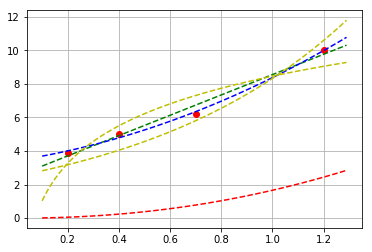

0.310711844351425
0.13994334305350264
0.6930203658770117
5.567362270521034
0.8351620030508672


In [169]:
import numpy as np

xs = np.array([0.2, 0.4, 0.7, 1.2])
ys = [3.9, 5.0, 6.2, 10.0]

linear_c = linear_approximation(xs, ys)
ys_linear = linear(xs, linear_c[0], linear_c[1])

square_c = square_approximation(xs, ys)
ys_square = polynomial_second_degree(xs, square_c[2], square_c[1], square_c[0])

exponent_c = exponent_approximation(xs, ys)
ys_exponent = exponent(xs, exponent_c[0], exponent_c[1])

power_c = power_approximation(xs, ys)
ys_power = power(xs, power_c[0], power_c[1])

logarithm_c = logarithmic_approximation(xs, ys)
ys_logarithm = ln(xs, logarithm_c[0], logarithm_c[1])

plot_x = np.array(np.arange(xs[0] - 0.1, xs[len(xs) - 1] + 0.1, step=0.01))

plt.plot(xs, ys, 'ro',
         plot_x, linear(plot_x, linear_c[0], linear_c[1]), 'g--',
         plot_x, polynomial_second_degree(plot_x, square_c[2], square_c[1], square_c[0]), 'b--',
         plot_x, exponent(plot_x, exponent_c[0], exponent_c[1]), 'y--',
         plot_x, power(plot_x, power_c[0], power_c[1]), 'r--',
         plot_x, ln(plot_x, logarithm_c[0], logarithm_c[1]), 'y--')
plt.grid()
plt.show()

#print(epsilon(ys, ys_linear))
print(standard_deviation(epsilon(ys, ys_linear)))
print(standard_deviation(epsilon(ys, ys_square)))
print(standard_deviation(epsilon(ys, ys_exponent)))
print(standard_deviation(epsilon(ys, ys_power)))
print(standard_deviation(epsilon(ys, ys_logarithm)))